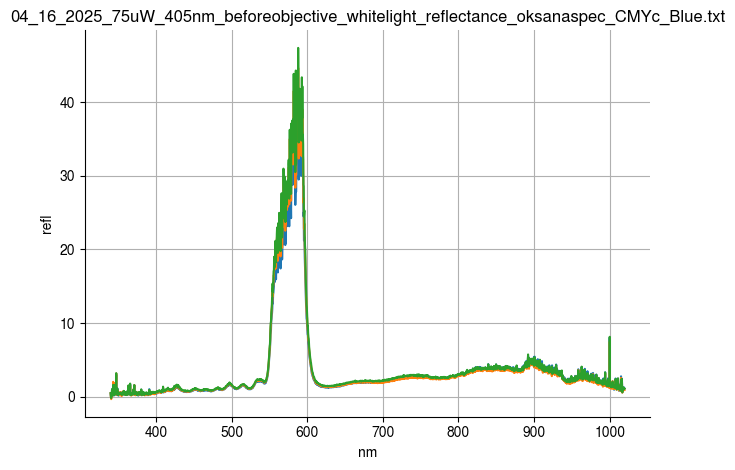

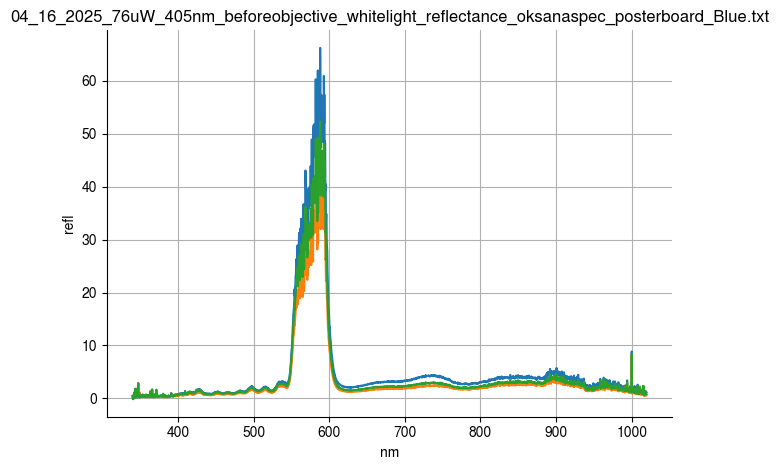

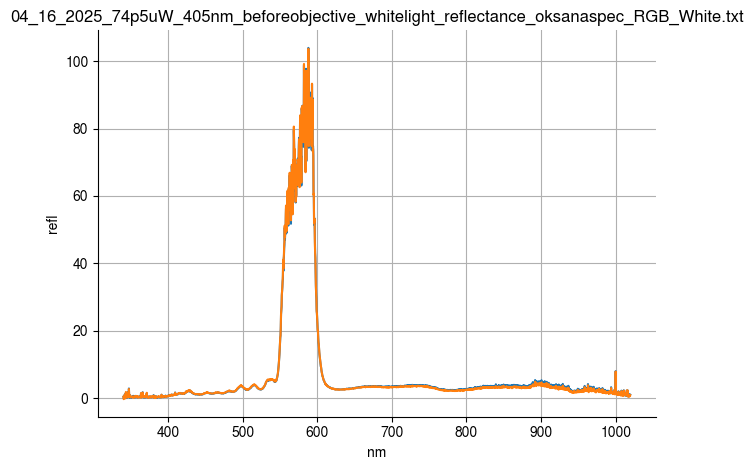

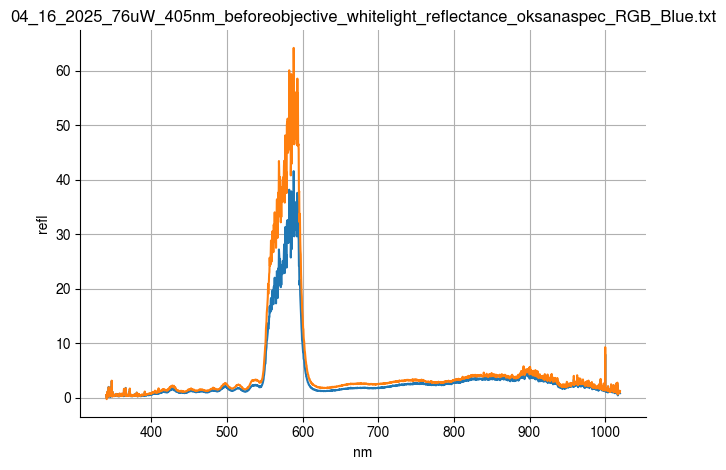

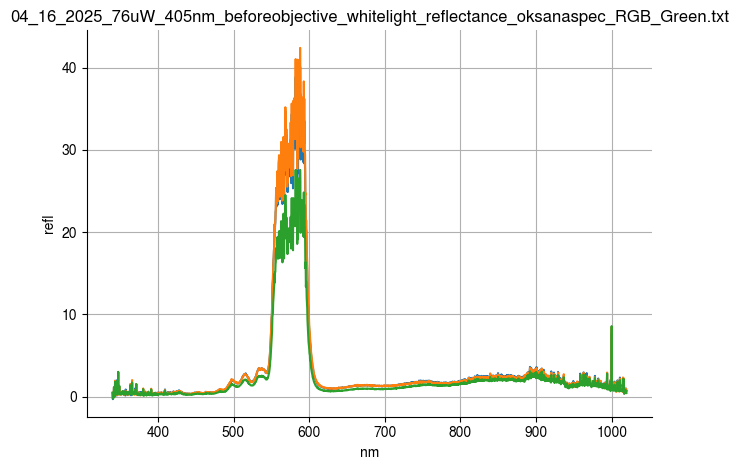

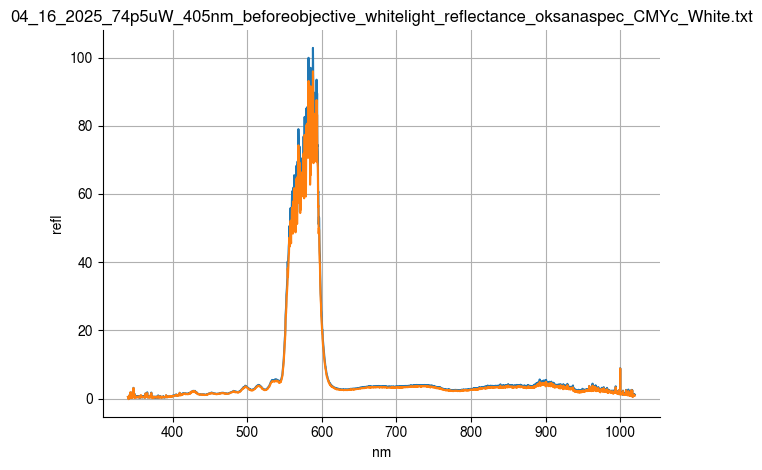

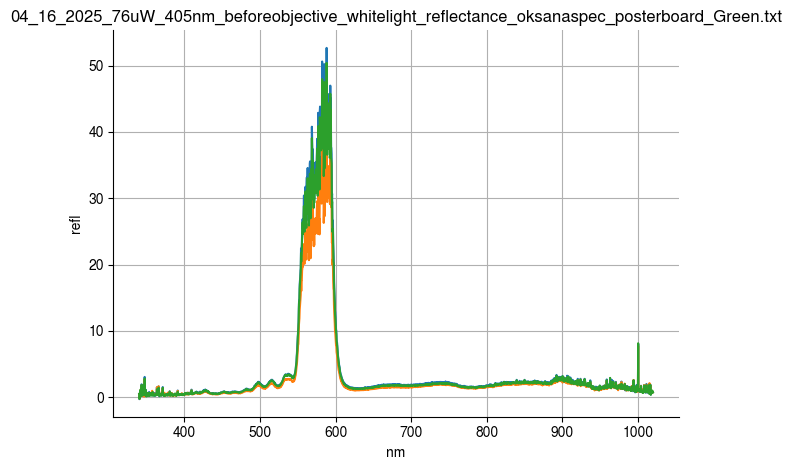

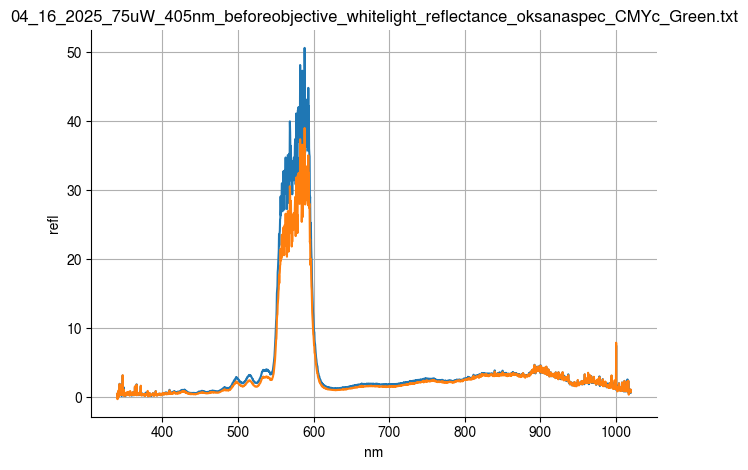

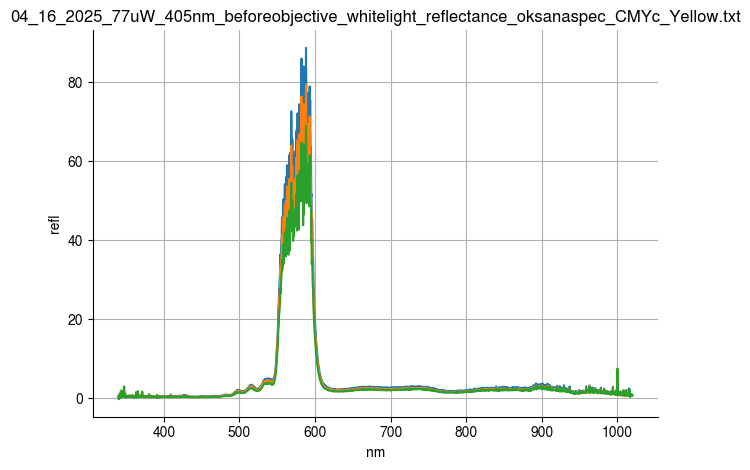

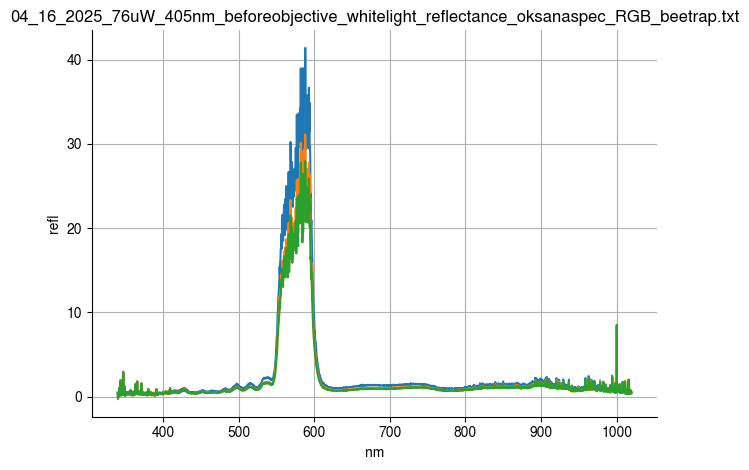

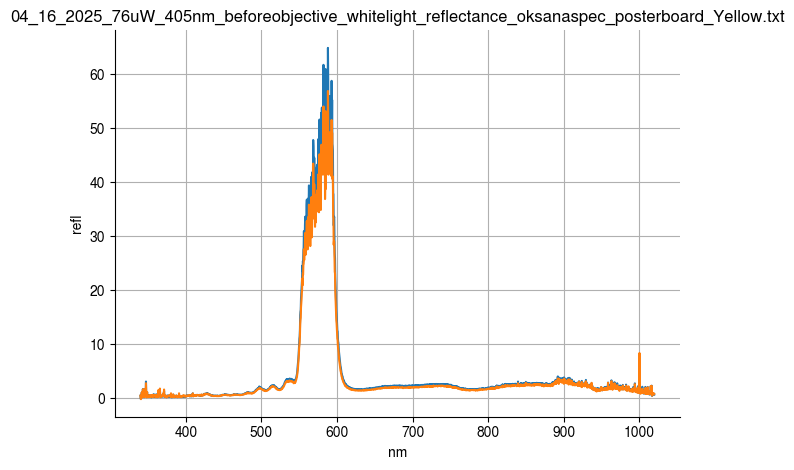

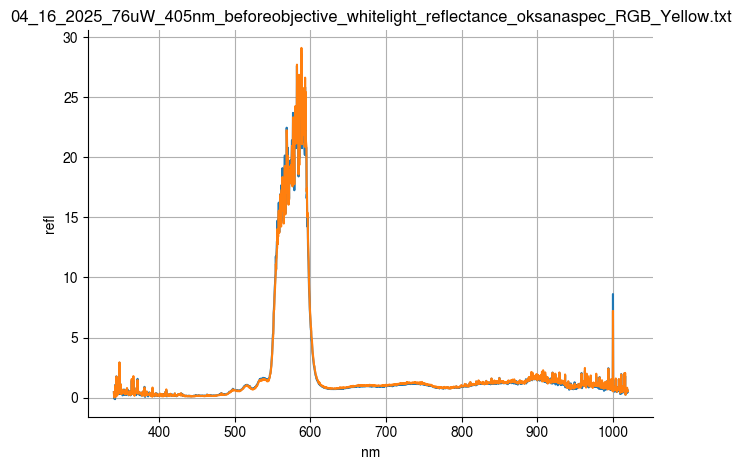

In [ ]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DATA_DIR = "./202504_data/reflectance"
csv_files = glob.glob(os.path.join(DATA_DIR, "*.txt"))

background_df = pd.read_csv('202504_data/UTF-8ag mirror background.txt', sep='\t', header=None)
background_data = background_df.iloc[1:].reset_index(drop=True)
avg_background = (background_data[3]+background_data[1])/2

for csv_file in csv_files:
    df = pd.read_csv(csv_file, sep='\t', header=None)
    header = df.iloc[0].dropna().tolist()
    data = df.iloc[1:].reset_index(drop=True)
    # print(len(data))
    clean_header = [h for h in header if pd.notna(h) and str(h).strip() != '']
    if len(clean_header) % 2 != 0:
        clean_header = clean_header[:-1] 
    col_pairs = [(clean_header[i], clean_header[i + 1]) for i in range(0, len(clean_header), 2)]

    plt.figure()
    for i, (x_label, y_label) in enumerate(col_pairs):
        x_vals = pd.to_numeric(data.iloc[:, 2*i])
        y_vals = pd.to_numeric(data.iloc[:, 2*i + 1])
        norm_y = y_vals / avg_background
        plt.plot(x_vals, norm_y, label=f"Norm {y_label}")

    # plt.xlim(400, 600)
    # plt.ylim(0,10)
    # plt.axvline(x=430, color='red', linestyle='--', linewidth=1.5)

    plt.title(f"{os.path.basename(csv_file)}")
    plt.xlabel("nm")
    plt.ylabel("refl")
    # plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


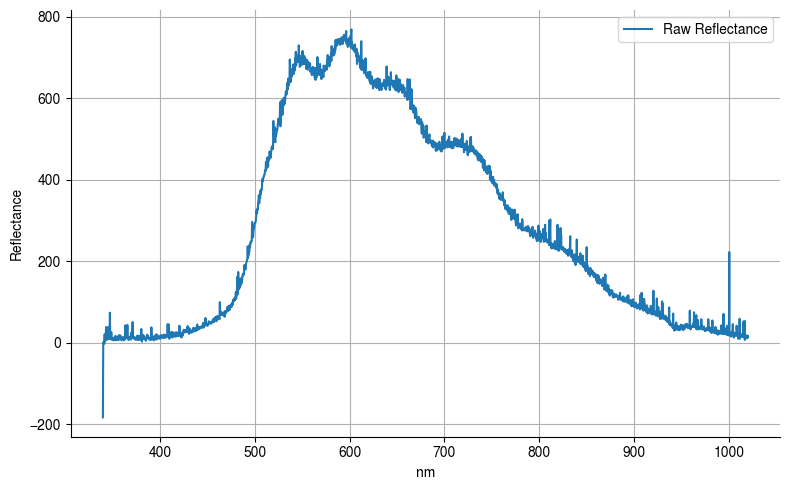

In [ ]:
plt.figure(figsize=(8, 5))
x_vals = pd.to_numeric(data.iloc[:, 0])
y_vals = pd.to_numeric(data.iloc[:, 1])

plt.plot(x_vals, y_vals)

plt.xlabel("nm")
plt.ylabel("Raw Reflectance")
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,340.064,-183.56,340.064,-181.78,340.064,-183.72,340.064,-181.72,340.064,-184.17,NaN
1,340.433,-0.56,340.433,0.22,340.433,-7.72,340.433,-1.72,340.433,-3.17,NaN
2,340.803,-1.56,340.803,0.22,340.803,0.28,340.803,-3.72,340.803,-3.17,NaN
3,341.172,3.44,341.172,1.22,341.172,1.28,341.172,-1.72,341.172,-6.17,NaN
4,341.542,-2.56,341.542,4.22,341.542,2.28,341.542,1.28,341.542,0.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2043,1018.456,10.44,1018.456,13.22,1018.456,20.28,1018.456,12.28,1018.456,10.83,NaN
2044,1018.741,11.44,1018.741,21.22,1018.741,12.28,1018.741,19.28,1018.741,17.83,NaN
2045,1019.026,17.44,1019.026,19.22,1019.026,19.28,1019.026,21.28,1019.026,18.83,NaN
2046,1019.312,11.44,1019.312,13.22,1019.312,12.28,1019.312,12.28,1019.312,6.83,NaN


2048


(0.0, 10.0)

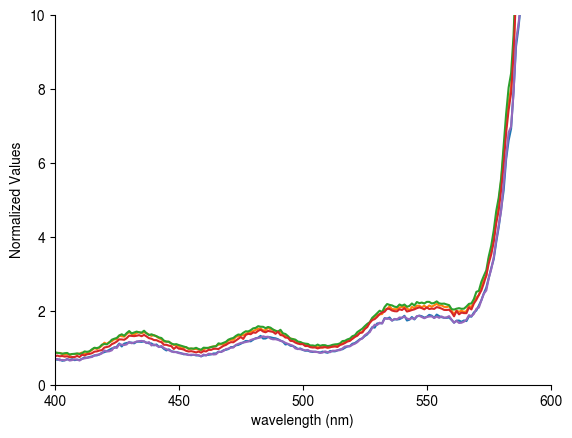

In [11]:
df = pd.read_csv("202504_data/UTF-8whitelight Murdock CMYc blue.txt", sep='\t', header=None)

df = df.drop(columns=[2, 4, 6, 8, 10])
data = df.iloc[1:].reset_index(drop=True)

background_data = background_df.iloc[1:].reset_index(drop=True)
avg_background = (background_data[3]+background_data[1])/2
print(len(avg_background))

for col in range(1, 11, 2):
    plt.plot(data[0], (data[col])/avg_background)

plt.xticks(
    ticks=range(400,700,50),
    labels=range(400,700,50)
)

plt.xlabel('wavelength (nm)')
plt.ylabel('Normalized Values')
plt.xlim(400,600)
plt.ylim(0,10)

In [5]:
background_data = data = background_df.iloc[1:].reset_index(drop=True)
avg_background = (background_data[3]+background_data[1])/2
avg_background


0      -398.695
1        19.305
2        15.305
3        19.805
4        19.805
         ...   
2043     25.305
2044     25.805
2045     27.305
2046     26.805
2047     26.305
Length: 2048, dtype: float64